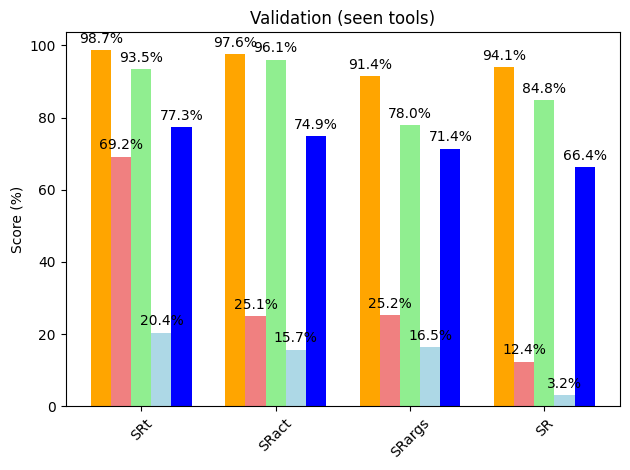

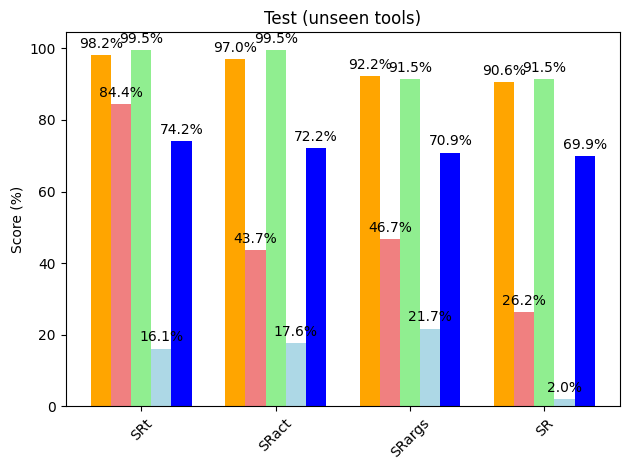

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
models = ['Vicuna-13B with GPT4Tools', 'Vicuna-13B', 'GPT-3.5 (Visual ChatGPT)', 'LLaMa-13B', 'LLaMa-13B with GPT4Tools']
metrics = ['SRt', 'SRact', 'SRargs', 'SR']

# Validation data
validation_data = np.array([
    [98.7, 97.6, 91.4, 94.1],
    [69.2, 25.1, 25.2, 12.4],
    [93.5, 96.1, 78.0, 84.8],
    [20.4, 15.7, 16.5, 3.2],
    [77.3, 74.9, 71.4, 66.4]
]).T

unseen_validation_data = np.array([
    [98.2, 84.4, 99.5, 16.1, 74.2],
    [97.0, 43.7, 99.5, 17.6, 72.2],
    [92.2, 46.7, 91.5, 21.7, 70.9],
    [90.6, 26.2, 91.5, 2.0, 69.9]
])

# Define colors for each model
colors = ['orange', 'lightcoral', 'lightgreen', 'lightblue', 'blue']

def plot_chart(data, title):
    fig, ax = plt.subplots()
    width = 0.15
    x = np.arange(len(metrics))
    
    for i, metric in enumerate(models):
        bars = ax.bar(x + i*width, data[:, i], width=width, label=metric, color=colors[i])  # Use data[:, i] to access each metric
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%', 
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    ax.set_xticks(x + width*(len(models)-1)/2)
    ax.set_xticklabels(metrics, rotation=45)  # Use models for x-axis labels
    ax.set_ylabel('Score (%)')
    ax.set_title(title)
    # ax.legend(loc='best', bbox_to_anchor=(0.5, -0.2), fancybox=True)
    plt.tight_layout()
    plt.show()

# Plot validation chart
plot_chart(validation_data, 'Validation (seen tools)')
plot_chart(unseen_validation_data, 'Test (unseen tools)')

